<a href="https://colab.research.google.com/github/faraztrazaky/RLD/blob/main/HeartAttackSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library & Load Data

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [40]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [42]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [43]:
df = df.fillna(method='ffill')

In [44]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


### Preprocess Data

In [47]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd # Ensure pandas is imported

def preprocess_data(df):
    # Create a copy to avoid modifying the original DataFrame outside the function
    df_processed = df.copy()

    # === 1. Manual Encoding ===
    mappings = {
        'gender': {'Male': 0, 'Female': 1},
        'region': {'Rular': 0, 'Urban': 1},
        'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
        'EKG_results': {'Normal': 0, 'Abnormal': 1},
        'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
        'alcohol_consumption': {'None': 0, 'Moderate': 1, 'High': 2},
        'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
        'dietary_habits': {'Healthy': 0, 'Unhealthy': 1},
        'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
        'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2}
    }

    for col, mapping in mappings.items():
        if col in df_processed.columns:
            # .map() will produce NaN for values not in the mapping
            df_processed[col + '_encoded'] = df_processed[col].map(mapping)

    # === Handle NaNs introduced by encoding ===
    # Fill NaNs in the newly created encoded columns.
    # Using -1 is a common approach for unknown categories after mapping.
    encoded_cols = [col + '_encoded' for col in mappings.keys() if col in df_processed.columns]
    df_processed[encoded_cols] = df_processed[encoded_cols].fillna(-1) # Fill NaN with -1

    # === 2. Pilih fitur numerik & encoded saja ===
    # Include the newly created encoded columns in feature selection
    feature_cols = [
        col for col in df_processed.columns
        if col not in ['heart_attack'] and df_processed[col].dtype in ['int64', 'float64']
    ]

    X = df_processed[feature_cols]
    y = df_processed['heart_attack']

    # === 3. Standard Scaling ===
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # === 4. SMOTE (oversampling untuk data imbalance) ===
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return X_resampled, y_resampled, scaler

# Rest of your code
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming df is already loaded and filled using ffill as in the original code
# df = pd.read_csv('heart_attack_prediction_indonesia.csv')
# df = df.fillna(method='ffill')

X_train, y_train, scaler = preprocess_data(df)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import SGDClassifier  # For Linear (logistic-like) regression
import xgboost as xgb

In [49]:
# === Split data ===
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

In [50]:
# === Define Models ===
#models = {
    #"Random Forest": RandomForestClassifier(),
    #"Naive Bayes": GaussianNB(),
    #"K-Nearest Neighbors": KNeighborsClassifier(),
#}

In [51]:
#models = {
    #"Neural Network (MLP)": MLPClassifier(max_iter=500, random_state=42),
    #"MLP Annotation": MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=42),
#}

In [52]:
#models = {
    #"Decision Tree": DecisionTreeClassifier(),
    #"Gradient Boosting": GradientBoostingClassifier(),
    #"XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
#}

In [53]:
models = {
    "Linear Classifier (SGD)": SGDClassifier(loss='log_loss', max_iter=1000, random_state=42),
}

In [54]:
results = []

# === Evaluate Each Model ===
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_test_split)
    acc = accuracy_score(y_test_split, y_pred)
    results.append({"Model": name, "Accuracy": acc})


In [55]:
# === Optional: Clustering (unsupervised) ===
#ahc = AgglomerativeClustering(n_clusters=2)
#ahc_labels = ahc.fit_predict(X_test_split)
#ahc_accuracy = accuracy_score(y_test_split, ahc_labels)
#results.append({"Model": "Agglomerative Clustering", "Accuracy": ahc_accuracy})

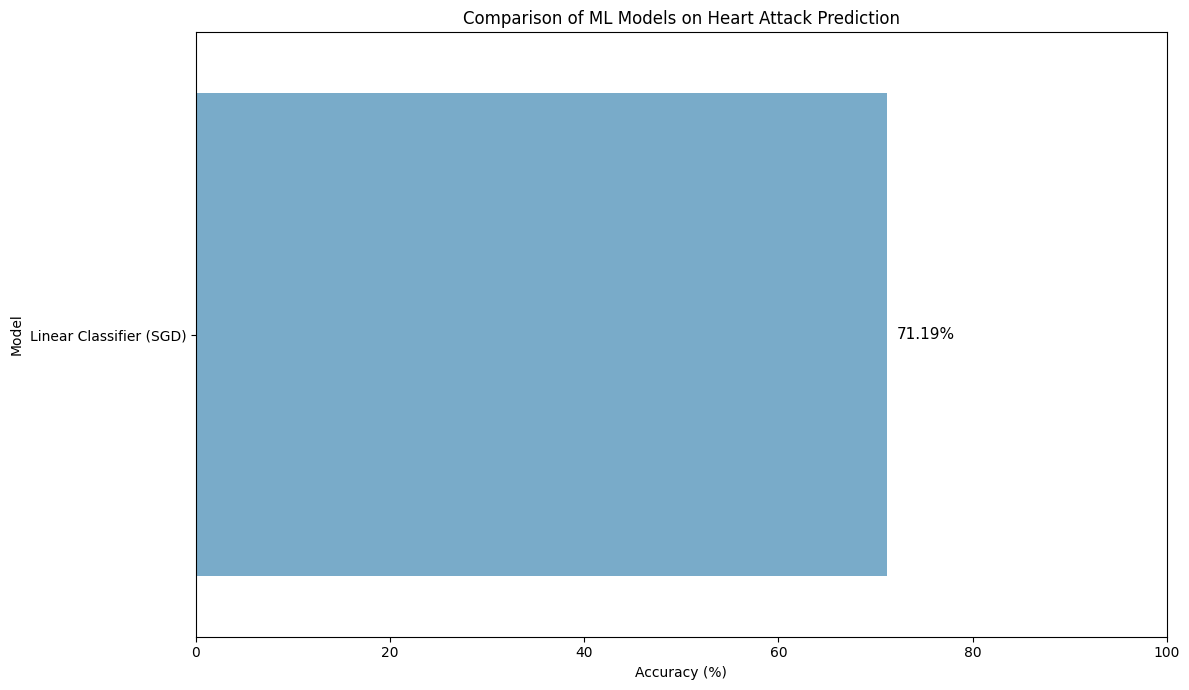

In [56]:
# === Create DataFrame and Visualize ===
accuracy_df = pd.DataFrame(results)
accuracy_df["Accuracy"] = accuracy_df["Accuracy"] * 100

plt.figure(figsize=(12, 7))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df.sort_values("Accuracy"), palette="Blues_r")

for index, value in enumerate(accuracy_df.sort_values("Accuracy")["Accuracy"]):
    plt.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=11)

plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.title("Comparison of ML Models on Heart Attack Prediction")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()
